
# import libraries

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20, 10)
matplotlib.rcParams['image.cmap'] = 'gray'

# Read and display image

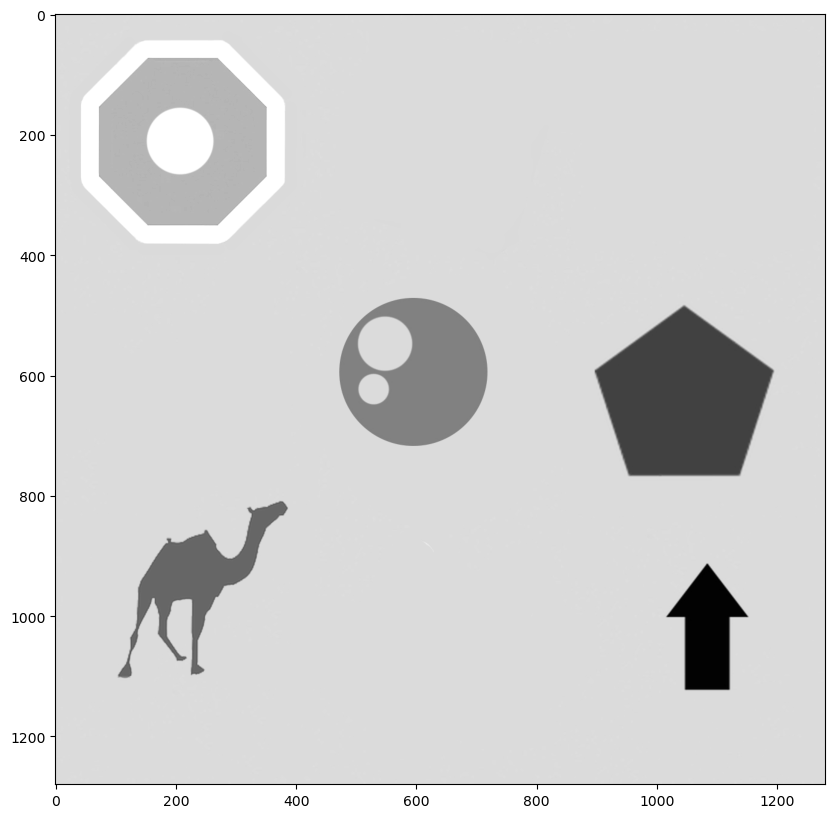

In [5]:
image = cv2.imread("shapes.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray)

# apply threshold to the image

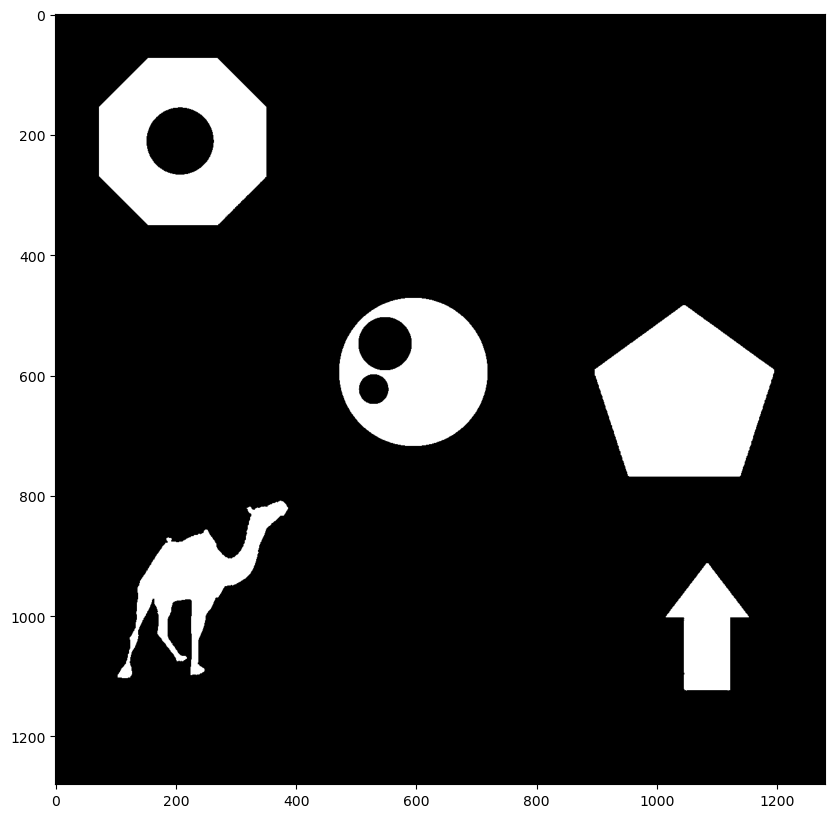

In [8]:
ret, thresh = cv2.threshold(image_gray, 200, 255, cv2.THRESH_BINARY_INV )
plt.imshow(thresh)

# Contour Finding

In [9]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [38]:
print("Number of contours found = {}".format(len(contours)))
print(contours[3])
print("\nHierarchy: \n{}".format(hierarchy))

Number of contours found = 5
[[[581 472]]

 [[580 473]]

 [[574 473]]

 [[573 474]]

 [[569 474]]

 [[568 475]]

 [[564 475]]

 [[563 476]]

 [[561 476]]

 [[560 477]]

 [[557 477]]

 [[556 478]]

 [[555 478]]

 [[554 479]]

 [[552 479]]

 [[551 480]]

 [[549 480]]

 [[548 481]]

 [[547 481]]

 [[546 482]]

 [[544 482]]

 [[543 483]]

 [[542 483]]

 [[541 484]]

 [[540 484]]

 [[539 485]]

 [[538 485]]

 [[537 486]]

 [[536 486]]

 [[534 488]]

 [[533 488]]

 [[532 489]]

 [[531 489]]

 [[529 491]]

 [[528 491]]

 [[527 492]]

 [[526 492]]

 [[523 495]]

 [[522 495]]

 [[519 498]]

 [[518 498]]

 [[514 502]]

 [[513 502]]

 [[502 513]]

 [[502 514]]

 [[498 518]]

 [[498 519]]

 [[495 522]]

 [[495 523]]

 [[492 526]]

 [[492 527]]

 [[491 528]]

 [[491 529]]

 [[489 531]]

 [[489 532]]

 [[488 533]]

 [[488 534]]

 [[486 536]]

 [[486 537]]

 [[485 538]]

 [[485 539]]

 [[484 540]]

 [[484 541]]

 [[483 542]]

 [[483 543]]

 [[482 544]]

 [[482 546]]

 [[481 547]]

 [[481 548]]

 [[48

# drawing contours

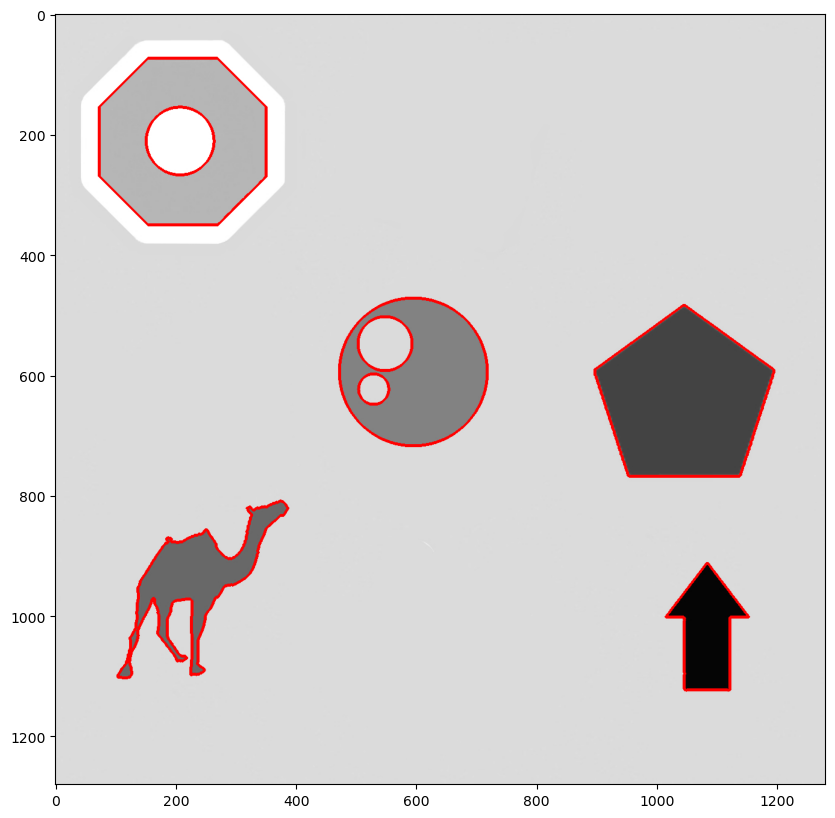

In [17]:
imageCopy1 = image.copy()
cv2.drawContours(imageCopy1, contours, -1, (0, 0, 255), 3)
plt.imshow(imageCopy1[:, :, ::-1])

# finding external contours

Number of contours found = 5


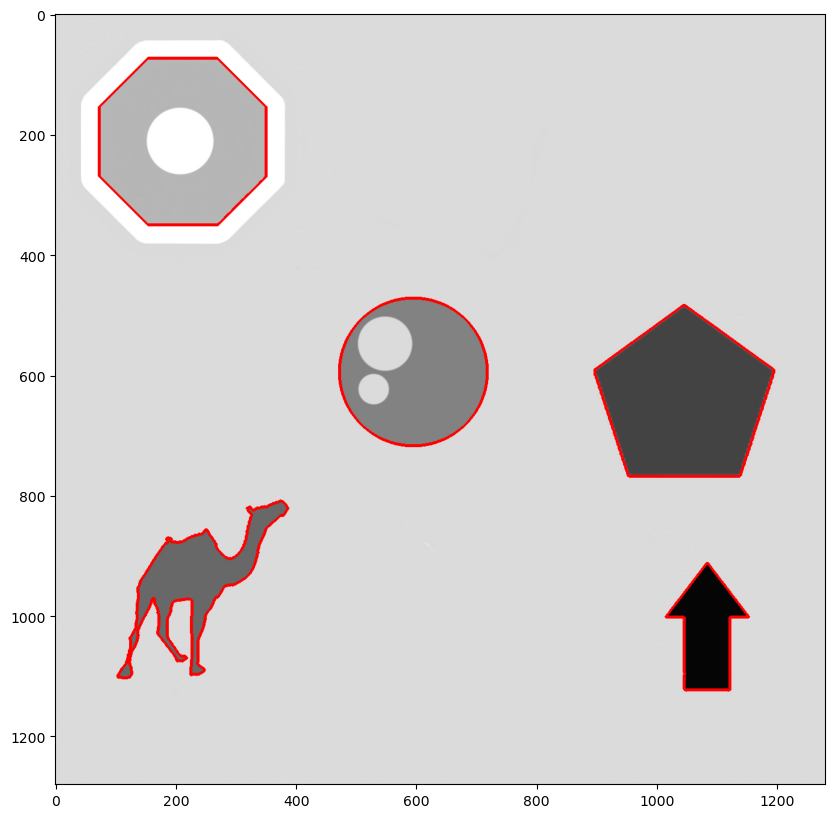

In [23]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print('Number of contours found = {}'.format(len(contours)))

imageCopy2 = image.copy()

draw_all = -1
cv2.drawContours(imageCopy2, contours, draw_all, (0, 0, 255), 3)

plt.imshow(imageCopy2[:, :, ::-1])

# draw nth contour

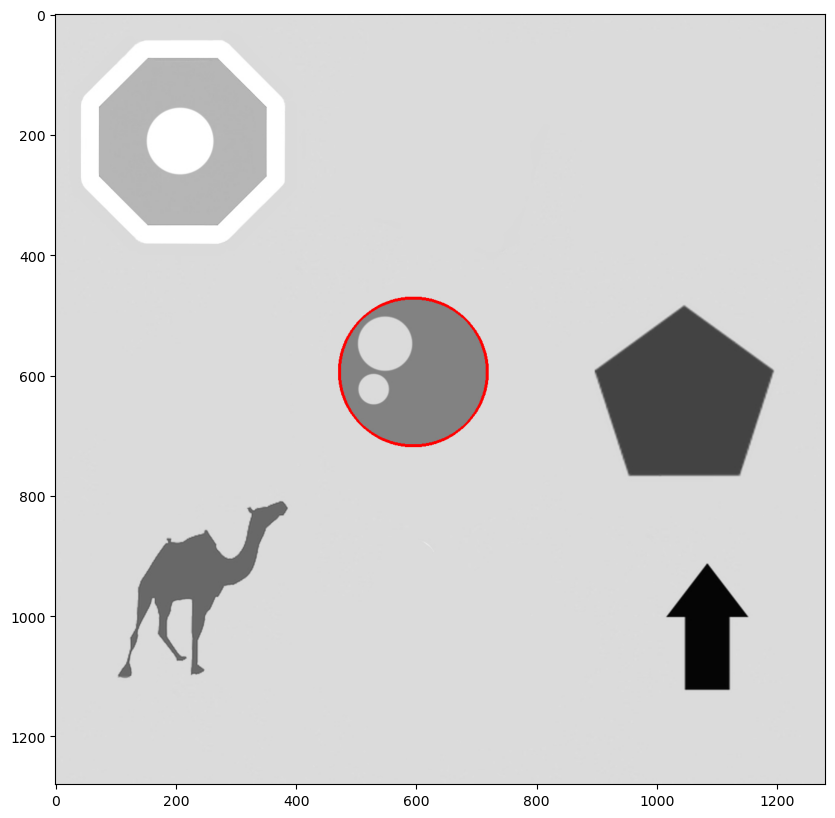

In [24]:
imageCopy3 = image.copy()

draw_ind = 3
cv2.drawContours(imageCopy3, contours, draw_ind, (0, 0, 255), 3)

plt.imshow(imageCopy3[:, :, ::-1])

# draw each contour in seperate colors

In [32]:
def convert_color(hsv):
    pixel_img = np.uint8([[hsv]])
    return tuple(int(i) for i in cv2.cvtColor(pixel_img, cv2.COLOR_HSV2BGR).flatten())


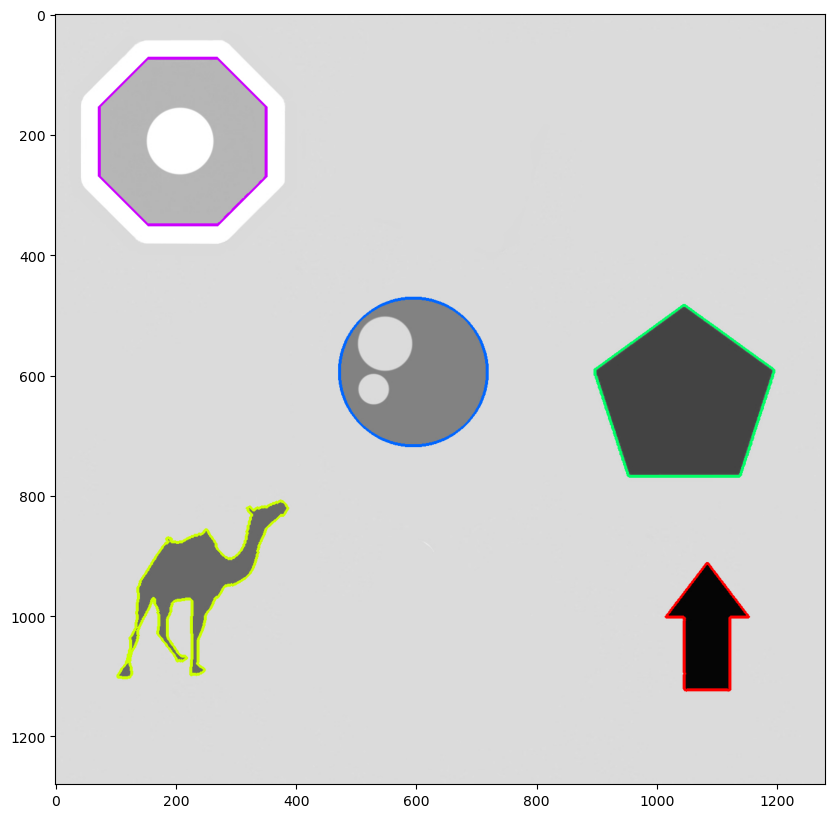

In [33]:
imageCopy4 = image.copy()

for i, single_contour in enumerate(contours):
    hsv = (int(i / len(contours) *180), 255, 255)
    color = convert_color(hsv)
    cv2.drawContours(imageCopy4, contours, i, color, 3)
    plt.imshow(imageCopy4[:, :, ::-1])

In [39]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
imageCopy5 = image.copy()

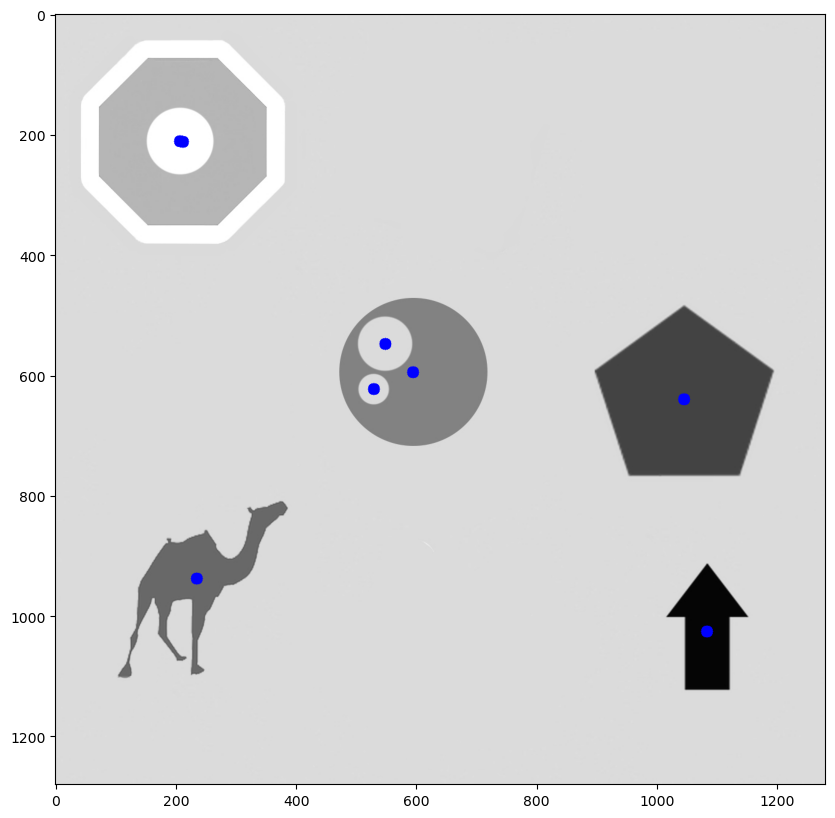

In [40]:
for cnt in contours:
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))
    cv2.circle(imageCopy5, (x,y), 10, (255,0,0), -1)
plt.imshow(imageCopy5[:,:,::-1]);

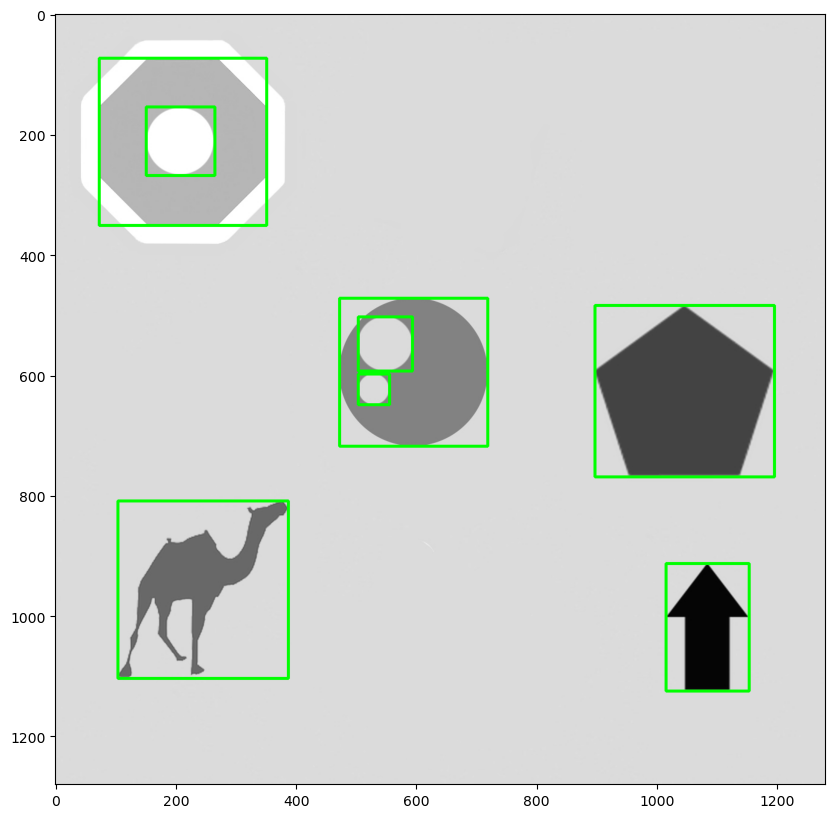

In [44]:
imageCopy6 = image.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(imageCopy6, (x, y), (x+w, y+h), (0, 255, 0), 4)
plt.imshow(imageCopy6[:,:,::-1]);

C:\Users\rajak\AppData\Local\Temp\ipykernel_15896\3040702124.py:4: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  boxPts = np.int0(cv2.boxPoints(box))


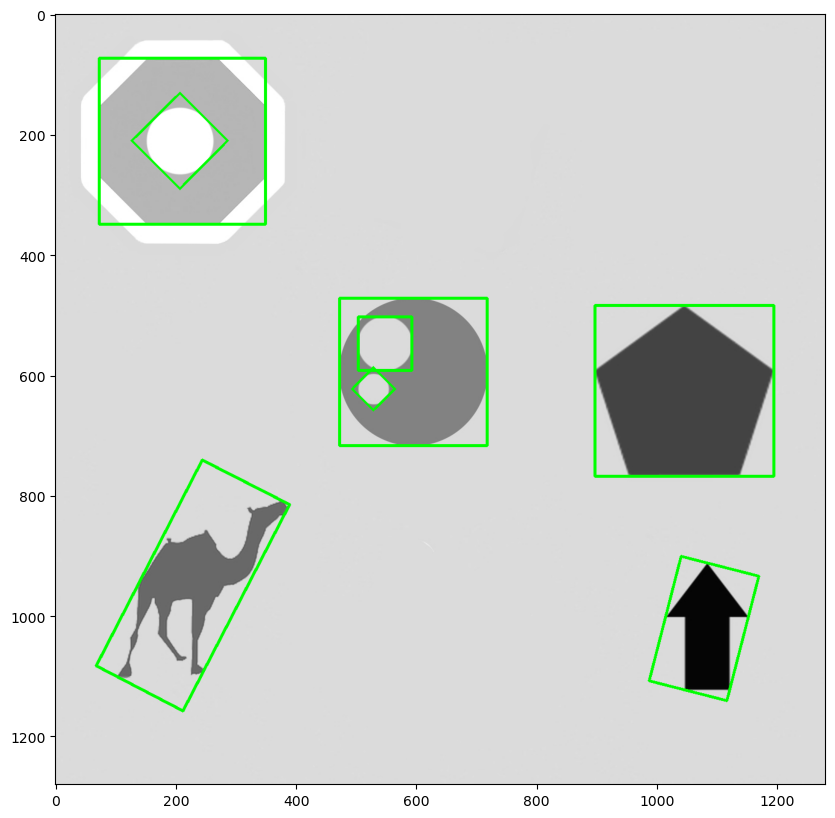

In [45]:
imageCopy7 = image.copy()
for cnt in contours:
    box = cv2.minAreaRect(cnt)
    boxPts = np.int0(cv2.boxPoints(box))
    cv2.drawContours(imageCopy7, [boxPts], -1, (0, 255, 0), 4)
plt.imshow(imageCopy7[:, :, ::-1])

# Intruder Detection

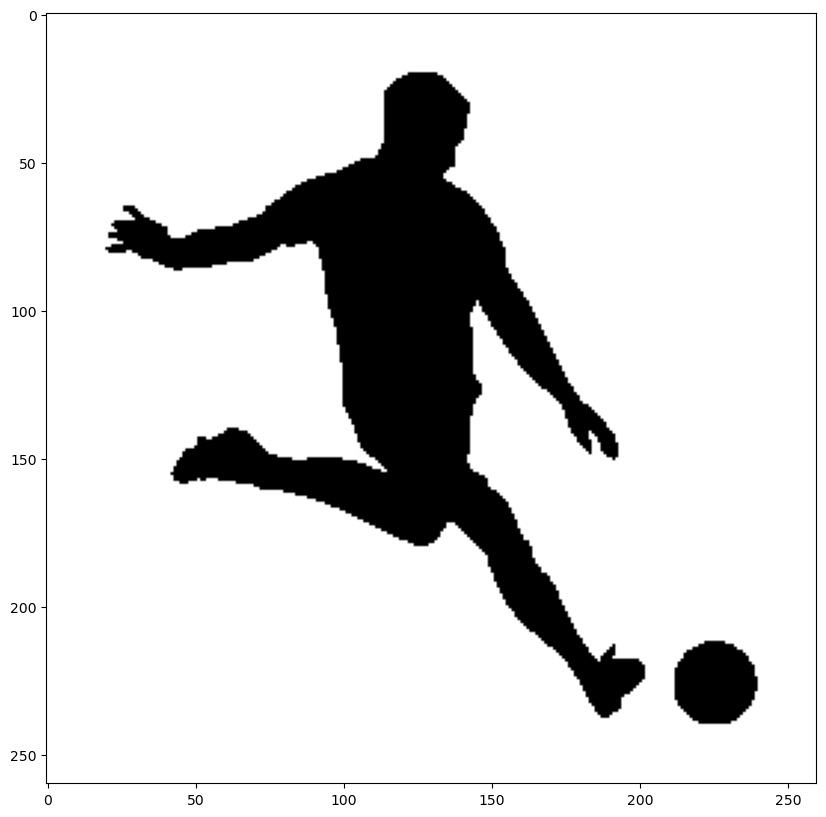

In [71]:

img = cv2.imread('soccer.jpg', cv2.IMREAD_COLOR)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(thresh);


Number of contours found : 3


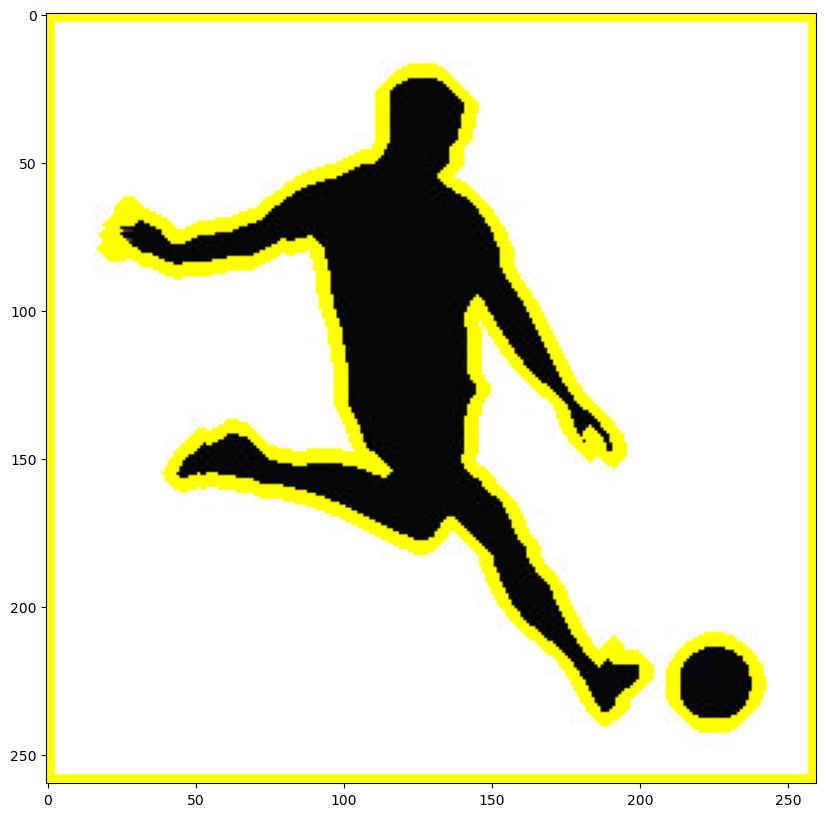

In [72]:
contours1, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
print('Number of contours found :',len(contours1))

imageCopy1 = img.copy()

draw_all = -1
cv2.drawContours(imageCopy1, contours1, draw_all, (0, 255, 255), 3)

plt.imshow(imageCopy1[:, :, ::-1])